In [27]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [39]:
sales = pd.read_csv('sales-cars.csv')
sales.head(2)

,Month,Sales
0,2016-01,266
1,2016-02,146


In [40]:
# def parser(x):
#     return datetime.strptime(x,'%Y-%m')

# sales = pd.read_csv('sales-cars.csv', parse_dates=[0] ,date_parser=parser)
sales['Month'] = pd.to_datetime(sales['Month'], yearfirst=True, infer_datetime_format= True)
index_dataset = sales.set_index('Month',inplace = True)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


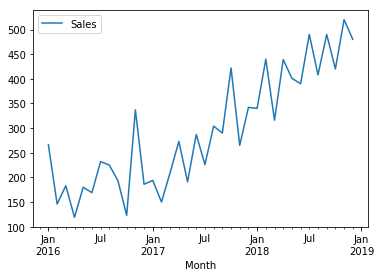

In [30]:
sales.plot()

### Rolling mean and standard deviation

In [31]:
roll_mean = sales.rolling(window = 12).mean()
roll_std = sales.rolling(window = 12).std()

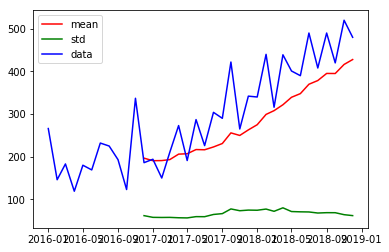

In [37]:
mean = plt.plot(roll_mean, 'r', label = 'mean')
std = plt.plot(roll_std, 'g', label = 'std')
data = plt.plot(sales, 'b', label = 'data')
plt.legend(loc = 'best')


# converting series into stationarity

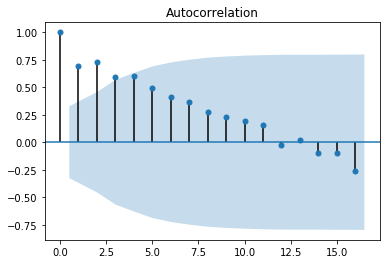

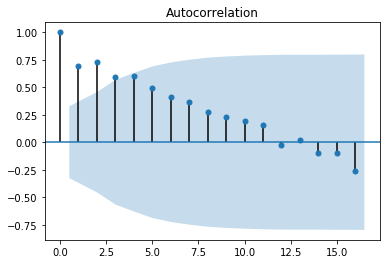

In [272]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### here we can see that autocorrelation is decaying slowly in above fig means stationarity is very less

### #integrated of order 1  ie d one of the parameters of arima


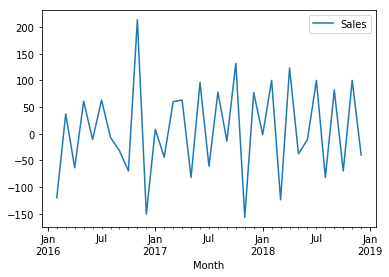

In [273]:
sales_diff1 = sales.diff(periods=1).dropna()
sales_diff1.head()
sales_diff1.plot()

### here in below fig autocorrelation falls at high rate means increase in stationarity

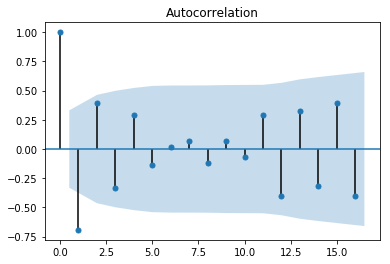

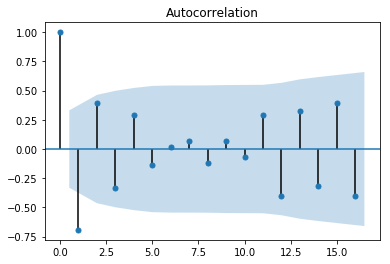

In [274]:
plot_acf(sales_diff1)

###  autoregression model Application on simple sales data

In [297]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [343]:
x_ar_simple = sales.values
train_simple = x_ar_simple[0:27]
test_simple = x_ar_simple[27:]


In [356]:
model_ar = AR(train_simple)
model_ar_fit = model_ar.fit()
predict_simple = model_ar_fit.predict(start = 27, end = 35)

9.193932045571165
<class 'numpy.ndarray'>


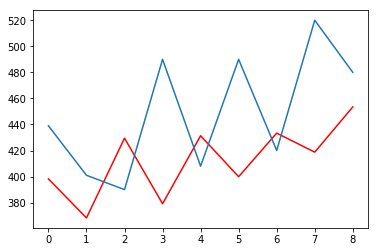

In [357]:
print(model_ar_fit.aic)
print(type(predict_simple))
plt.plot(predict, 'r')
plt.plot(test_simple)

In [340]:
mean_squared_error(test_simple,predictions)

197840.10780704388

### autoregression model Application on diff of sales data

In [560]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [586]:
x_ar_diff = sales_diff1.values
train_diff = x_ar_diff[0:36]
test_diff = x_ar_diff[9:]
len(test_diff)

26

In [587]:

model_ar = AR(train_diff)
model_ar_fit = model_ar.fit()
predict = model_ar_fit.predict(start = 11, end = 36)
len(predict)
# prediction.append(predict)

26

In [589]:
perdiction = []
for i in predict:
    perdiction.append(i)
len(perdiction)

26

In [546]:
lists = []
for i in range(8):
        lists.append(sales.Sales[i])
#         sales['perdiction'] = sales.Sales[i]
#     else:
#         print(prediction[i-8])
# sales.drop(perdiction, inplace = True)
# sales

In [547]:
list1 = []
for i in perdiction:
        list1.append(i)
lists = lists+list1
len(lists)

36

In [597]:
lists = []
for i in perdiction:
    lists.append(i)
len(lists)

26

In [607]:
# x_ar_diff[9:]
ndf = pd.DataFrame(x_ar_diff[9:])
ndf

,0
0,214.0
1,-151.0
2,8.0
3,-44.0
4,60.0
5,63.0
6,-82.0
7,96.0
8,-61.0
9,78.0


In [598]:
# ndf = pd.series(test_diff)
ndf = pd.series(x_ar_diff[9:])
ndf.set_index('Month').head()
ndf.shape
ndf['perdiction'] = lists
# ndf.head()
ndf.plot()
# ndf['prediction'] = lists

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

8.262627990490525


[]

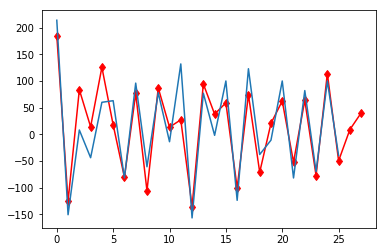

In [583]:
print(model_ar_fit.aic)
plt.plot(predict, 'rd-')
plt.plot(test_diff)
plt.plot()

### Arima model application Simple data 

In [304]:
from statsmodels.tsa.arima_model import ARIMA

In [316]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train_simple,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


297.1619840975368


In [317]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.05473265, 355.95234169, 413.11102326, 374.51868273,
       446.96326133, 378.64235997, 406.40903555, 411.41383596,
       475.92975243, 415.42188732])

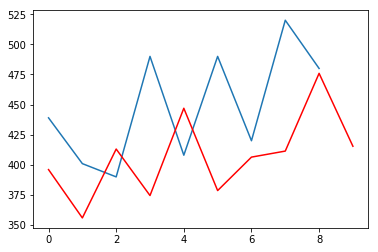

In [318]:
plt.plot(test_simple)
plt.plot(predictions,color='red')

In [322]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))


In [332]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train_simple,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028728575
(0, 0, 3) nan
(0, 0, 4) 310.1669328576465
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415381062906
(0, 1, 2) 296.322922690801
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194741083694
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.04871745241866
(1, 0, 2) 310.97906422366304
(1, 0, 4) nan
(1, 1, 0) 298.8325442270784
(1, 1, 1) 297.1256511258498
(1, 1, 2) 299.4716667063481
(1, 1, 3) 301.2851180947781
(1, 1, 4) 299.978732397109
(1, 2, 0) 306.53077675711666
(1, 2, 3) nan
(2, 0, 0) 310.996957362129
(2, 0, 1) 340.1244967391351
(2, 0, 4) 341.428847585567
(2, 1, 0) 300.20895612399585
(2, 1, 1) 297.99999301673483
(2, 1, 2) 298.55054281302364
(2, 1, 3) 302.8720847853808
(2, 2, 0) 306.297585643219
(2, 2, 3) nan
(3, 0, 0) 312.9838587441584
(3, 0, 1) 336.20638633467416
(3, 0, 4) nan
(3, 1, 0) 294.85435842189526
(3, 1, 1) 295.99793534185784
(3, 1, 2) 292.6686238694238
(3, 1, 3) 294.6588907516449
(3, 2, 0) 299.4075868155

### Arima model application diff data 

In [323]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train_diff,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


301.8624856916061


In [327]:
predictions= model_arima_fit.forecast(steps=9)[0]


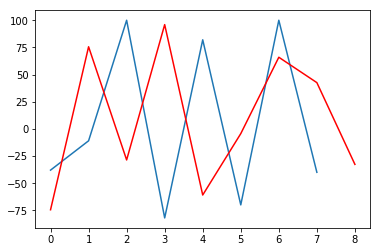

In [329]:
plt.plot(test_diff)
plt.plot(predictions,color='red')

In [331]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train_diff,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 324.39820432750815
(0, 0, 1) 308.0082182897029
(0, 0, 2) 306.8574915860776
(0, 1, 0) 343.4127008785868
(0, 1, 1) 318.2411240271365
(0, 2, 0) 362.1275778032357
(0, 2, 1) 336.596562766636
(1, 0, 0) 309.18956335855603
(1, 0, 1) 306.858942618171
(1, 0, 2) 306.99199323658434
(1, 0, 3) 311.96210604623957
(1, 0, 4) 309.256618934358
(1, 1, 0) 317.87726394170403
(1, 1, 1) 304.361056332431
(1, 1, 2) 299.61348009360023
(1, 1, 3) nan
(1, 1, 4) nan
(1, 2, 0) 329.7824543359751
(2, 0, 0) 310.54360833053363
(2, 0, 1) 308.7289296304592
(2, 0, 4) 311.32916564579875
(2, 1, 0) 317.29615611426937
(2, 1, 1) 305.773624107844
(2, 1, 3) nan
(2, 2, 0) 326.96547253700703
(3, 0, 0) 305.3298372236758
(3, 0, 1) 306.5957237017832
(3, 0, 2) 303.5404472705742
(3, 0, 3) 305.35170903257665
(3, 0, 4) 307.1475363958452
(3, 1, 0) 309.8732180733889
(3, 1, 1) 300.2538550939633
(3, 1, 2) 303.82420325902694
(3, 1, 3) 298.9622496189137
(3, 1, 4) 300.8621712904068
(3, 2, 0) 319.48984436857234
(3, 2, 1) 306.936666948606